<a href="https://colab.research.google.com/github/ranjanj1/Traffic-Accident-Analysis-in-Washington-DC/blob/main/Final_Notebook/601_DCTraffic_Analysis_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Traffic Accident Analysis in Washington, D.C.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
import statsmodels.formula.api as smf 
from statsmodels.graphics.regressionplots import plot_partregress_grid
import scipy.stats as stats
from scipy.stats.distributions import chi2
from patsy import dmatrices

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Import Datasets

In [2]:
# import crash datasets
# NOTE: the original Crash Data data file is too big to load into Github, therefore we had to break it down into multiple files. 
rawCrash1 = pd.read_csv('https://raw.githubusercontent.com/ranjanj1/Traffic-Accident-Analysis-in-Washington-DC/main/CrashData/Crashes_in_DC_0.csv', low_memory=False)
rawCrash2 = pd.read_csv('https://raw.githubusercontent.com/ranjanj1/Traffic-Accident-Analysis-in-Washington-DC/main/CrashData/Crashes_in_DC_1.csv', low_memory=False)
rawCrash3 = pd.read_csv('https://raw.githubusercontent.com/ranjanj1/Traffic-Accident-Analysis-in-Washington-DC/main/CrashData/Crashes_in_DC_2.csv', low_memory=False)
rawCrash4 = pd.read_csv('https://raw.githubusercontent.com/ranjanj1/Traffic-Accident-Analysis-in-Washington-DC/main/CrashData/Crashes_in_DC_3.csv', low_memory=False)
rawCrash5 = pd.read_csv('https://raw.githubusercontent.com/ranjanj1/Traffic-Accident-Analysis-in-Washington-DC/main/CrashData/Crashes_in_DC_4.csv', low_memory=False)
rawCrash6 = pd.read_csv('https://raw.githubusercontent.com/ranjanj1/Traffic-Accident-Analysis-in-Washington-DC/main/CrashData/Crashes_in_DC_5.csv', low_memory=False)

rawCrash = pd.concat([rawCrash1, rawCrash2, rawCrash3, rawCrash4, rawCrash5, rawCrash6])

In [3]:
# import weather dataset
rawWeather = pd.read_csv('https://raw.githubusercontent.com/ranjanj1/Traffic-Accident-Analysis-in-Washington-DC/main/WeatherData15-19.csv')

## Cleaning and Exploratory Data Analysis of Crash Data


In [4]:
# preview crash data 
pd.set_option('display.max_columns', None)
rawCrash.head(3)

X          Y   OBJECTID   CRIMEID       CCN  \
0 -76.927085  38.894377  192957077  27991659  19050656   
1 -77.036396  38.960467  192957078  27715972  18102625   
2 -76.958738  38.896709  192957079  27715973  18102602   

               REPORTDATE   ROUTEID  MEASURE  OFFSET  STREETSEGID  \
0  2019/03/26 13:33:18+00  12029642   534.43   18.93        615.0   
1  2018/06/24 03:49:07+00  11001602  6713.71    3.26       8029.0   
2  2018/06/24 04:05:53+00  12015342  2289.58    5.17       1272.0   

   ROADWAYSEGID                FROMDATE                  TODATE   MARID  \
0       14930.0  2019/03/26 04:00:00+00  1970/01/01 00:00:00+00   44982   
1        8915.0  2018/06/23 04:00:00+00  1970/01/01 00:00:00+00  256118   
2       12308.0  2018/06/23 04:00:00+00  1970/01/01 00:00:00+00  301049   

                  ADDRESS   LATITUDE  LONGITUDE      XCOORD      YCOORD  \
0  274 DIVISION AVENUE NE  38.894518 -76.927255  406310.624  136299.237   
1     5800 16TH STREET NW  38.960164 -77.036781  396812.190  143584.581   
2    3400 BENNING ROAD NE  38.896477 -76.951464  404210.372  136515.268   

     WARD                                 EVENTID             MAR_ADDRESS  \
0  Ward 7  {354DD7E1-A9A2-4240-9185-A3F4906C2228}  274 DIVISION AVENUE NE   
1  Ward 4  {17DE2546-EE88-4444-AFF1-950425DC1621}     5800 16TH STREET NW   
2  Ward 7  {1F2C12F2-A876-4219-B39E-2C8A3FAB41D7}    3400 BENNING ROAD NE   

   MAR_SCORE  MAJORINJURIES_BICYCLIST  MINORINJURIES_BICYCLIST  \
0      200.0                        0                        0   
1      200.0                        0                        0   
2      200.0                        0                        0   

   UNKNOWNINJURIES_BICYCLIST  FATAL_BICYCLIST  MAJORINJURIES_DRIVER  \
0                          0                0                     0   
1                          0                0                     0   
2                          0                0                     0   

   MINORINJURIES_DRIVER  UNKNOWNINJURIES_DRIVER  FATAL_DRIVER  \
0                     0                       0             0   
1                     0                       0             0   
2                     1                       0             0   

   MAJORINJURIES_PEDESTRIAN  MINORINJURIES_PEDESTRIAN  \
0                         0                         0   
1                         0                         0   
2                         0                         0   

   UNKNOWNINJURIES_PEDESTRIAN  FATAL_PEDESTRIAN  TOTAL_VEHICLES  \
0                           0                 0               1   
1                           0                 0               1   
2                           0                 0               4   

   TOTAL_BICYCLES  TOTAL_PEDESTRIANS  PEDESTRIANSIMPAIRED  BICYCLISTSIMPAIRED  \
0               0                  0                    0                   0   
1               0                  0                    0                   0   
2               0                  0                    0                   0   

   DRIVERSIMPAIRED  TOTAL_TAXIS  TOTAL_GOVERNMENT  SPEEDING_INVOLVED  \
0                0            0                 0                  0   
1                0            0                 0                  0   
2                1            0                 0                  1   

  NEARESTINTROUTEID NEARESTINTSTREETNAME  OFFINTERSECTION  \
0          12024242          CLOUD PL NE            13.10   
1          11064872      NICHOLSON ST NW            32.57   
2          12003402           34TH ST NE           109.14   

  INTAPPROACHDIRECTION LOCATIONERROR          LASTUPDATEDATE  MPDLATITUDE  \
0                South           NaN  1970/01/01 00:00:00+00    38.894415   
1                North           NaN  1970/01/01 00:00:00+00    38.960459   
2                 West           NaN  1970/01/01 00:00:00+00    38.896747   

   MPDLONGITUDE    MPDGEOX    MPDGEOY                          BLOCKKEY  \
0    -76.927293  406307.42  136287.79 

In [5]:
# number of rows and columns
rows = len(rawCrash.axes[0])
cols = len(rawCrash.axes[1])
print("Number of rows: ", rows)
print("Number of columns: ", cols)

# check for duplicates in rawCrash
rduplicate = rawCrash.duplicated()
print("number of duplicates in data:",rduplicate.sum())

Number of rows:  245136
Number of columns:  60
number of duplicates in data: 0


In [6]:
# display column names
print("there are",len(rawCrash.columns), "columns in the data")
print(rawCrash.columns)

there are 60 columns in the data
Index(['X', 'Y', 'OBJECTID', 'CRIMEID', 'CCN', 'REPORTDATE', 'ROUTEID',
       'MEASURE', 'OFFSET', 'STREETSEGID', 'ROADWAYSEGID', 'FROMDATE',
       'TODATE', 'MARID', 'ADDRESS', 'LATITUDE', 'LONGITUDE', 'XCOORD',
       'YCOORD', 'WARD', 'EVENTID', 'MAR_ADDRESS', 'MAR_SCORE',
       'MAJORINJURIES_BICYCLIST', 'MINORINJURIES_BICYCLIST',
       'UNKNOWNINJURIES_BICYCLIST', 'FATAL_BICYCLIST', 'MAJORINJURIES_DRIVER',
       'MINORINJURIES_DRIVER', 'UNKNOWNINJURIES_DRIVER', 'FATAL_DRIVER',
       'MAJORINJURIES_PEDESTRIAN', 'MINORINJURIES_PEDESTRIAN',
       'UNKNOWNINJURIES_PEDESTRIAN', 'FATAL_PEDESTRIAN', 'TOTAL_VEHICLES',
       'TOTAL_BICYCLES', 'TOTAL_PEDESTRIANS', 'PEDESTRIANSIMPAIRED',
       'BICYCLISTSIMPAIRED', 'DRIVERSIMPAIRED', 'TOTAL_TAXIS',
       'TOTAL_GOVERNMENT', 'SPEEDING_INVOLVED', 'NEARESTINTROUTEID',
       'NEARESTINTSTREETNAME', 'OFFINTERSECTION', 'INTAPPROACHDIRECTION',
       'LOCATIONERROR', 'LASTUPDATEDATE', 'MPDLATITUDE', 'MPDL

In [7]:
# drop unnecessary columns. Mostly location data. 
variables = ['REPORTDATE']
cleanCrash = rawCrash.loc[:,variables]

# convert date variables to datetime data types. Making new variables for day, month, hour, year
cleanCrash['REPORTDATE'] = pd.to_datetime(cleanCrash['REPORTDATE'])
cleanCrash['CrashCount'] = 1
cleanCrash['Hour'] = cleanCrash['REPORTDATE'].dt.hour
cleanCrash['Day'] = cleanCrash['REPORTDATE'].dt.day
cleanCrash['Month'] = cleanCrash['REPORTDATE'].dt.month
cleanCrash['Year'] = cleanCrash['REPORTDATE'].dt.year

In [8]:
# display crash information
cleanCrash.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245136 entries, 0 to 4399
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype              
---  ------      --------------   -----              
 0   REPORTDATE  245136 non-null  datetime64[ns, UTC]
 1   CrashCount  245136 non-null  int64              
 2   Hour        245136 non-null  int64              
 3   Day         245136 non-null  int64              
 4   Month       245136 non-null  int64              
 5   Year        245136 non-null  int64              
dtypes: datetime64[ns, UTC](1), int64(5)
memory usage: 13.1 MB


In [9]:
# checking for null values. Very little and mostly in address and ward which is not too concerning, 
# dropped address from and to date
null = cleanCrash.isnull().sum()
print(null)

REPORTDATE    0
CrashCount    0
Hour          0
Day           0
Month         0
Year          0
dtype: int64


In [10]:
# limit crash data to 2016-2019 to match the weather data range
crash = cleanCrash.loc[(cleanCrash['REPORTDATE'].dt.year > 2015) & (cleanCrash['REPORTDATE'].dt.year < 2020)]

Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

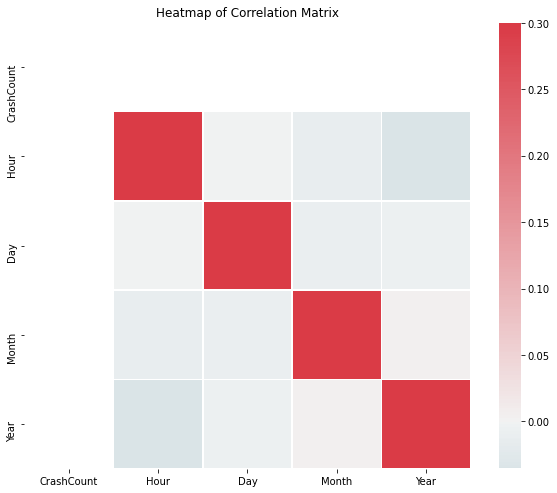

In [11]:
# heatmap of features
corr = crash.corr()
plt.figure(figsize = (10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Heatmap of Correlation Matrix')

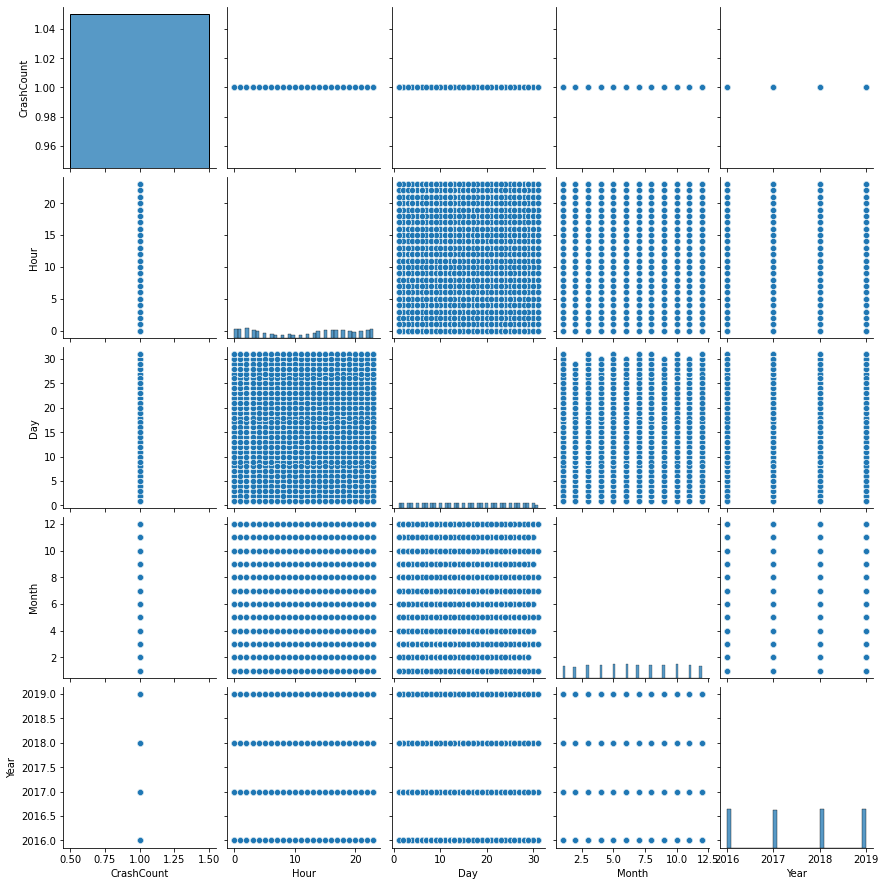

In [12]:
# pairplot to display the relationships between variables
sns.pairplot(crash)

In [13]:
#checking shape to make sure correct number of columns were dropped
crash.shape

(106422, 6)

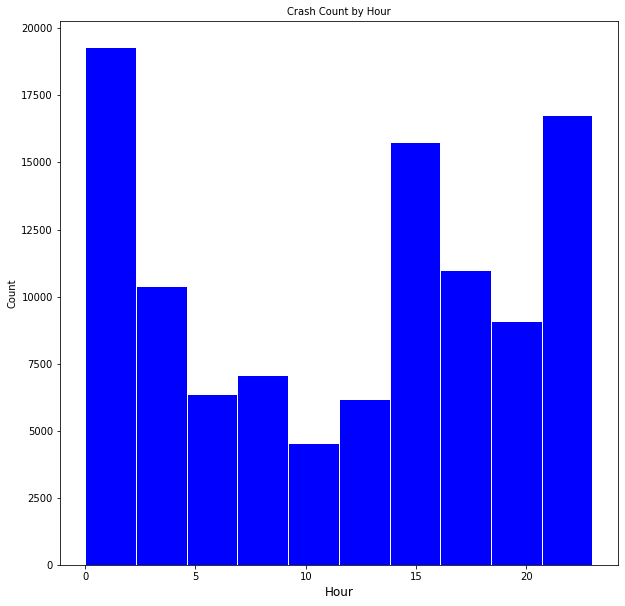

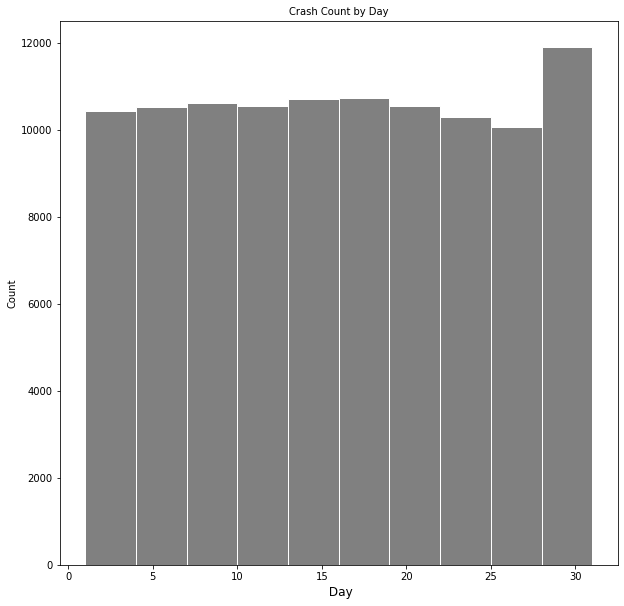

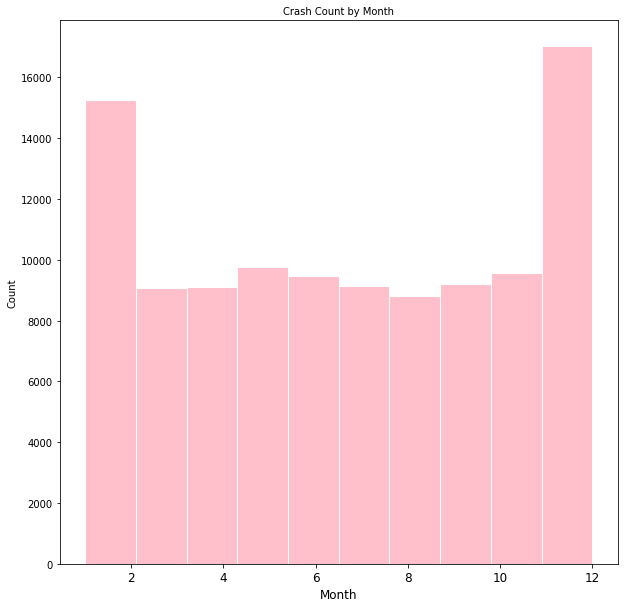

In [14]:
#Histogram of hours
fig = plt.figure(figsize=(10,10))
plt.hist(crash['Hour'], color = 'Blue',edgecolor = 'white')
plt.title('Crash Count by Hour', color = 'Black', size = 10)
plt.xlabel('Hour', size= 12)
plt.tick_params(axis='x', labelsize=10)
plt.ylabel('Count')
plt.show()

#Histogram of Days
fig = plt.figure(figsize=(10,10))
plt.hist(crash['Day'], color = 'Grey',edgecolor = 'white')
plt.title('Crash Count by Day', color = 'Black', size = 10)
plt.xlabel(' Day', size= 12)
plt.tick_params(axis='x', labelsize=10)
plt.ylabel('Count')
plt.show()

#Histogram of Months
fig = plt.figure(figsize=(10,10))
plt.hist(crash['Month'], color = 'Pink',edgecolor = 'white')
plt.title('Crash Count by Month', color = 'Black', size = 10)
plt.xlabel('Month', size= 12)
plt.tick_params(axis='x', labelsize=12)
plt.ylabel('Count')
plt.show()

## Cleaning and Exploratory Data Analysis of Weather Data

In [15]:
# set Date Time column as datetime data
rawWeather['Date time'] = pd.to_datetime(rawWeather['Date time'])

In [16]:
# view shape of weather data
rawWeather.shape

(1831, 17)

In [17]:
# filter weather date to 2016 and display updated row and column count
rawWeather = rawWeather.loc[(rawWeather['Date time'] > '2015-12-31')]
rawWeather.shape

(1465, 17)

In [18]:
# check for duplicate 
duplicateRowsDF = rawWeather[rawWeather.duplicated(['Date time'])]
duplicateRowsDF.shape

(4, 17)

In [19]:
# filter out duplicate records and preview the data 
weather = rawWeather.drop_duplicates(subset ="Date time", keep = 'first', ignore_index = True)
weather.head()

Name  Date time  Maximum Temperature  \
0  Washington, DC, United States 2016-01-01                 46.0   
1  Washington, DC, United States 2016-01-02                 47.9   
2  Washington, DC, United States 2016-01-03                 53.0   
3  Washington, DC, United States 2016-01-04                 37.9   
4  Washington, DC, United States 2016-01-05                 33.0   

   Minimum Temperature  Temperature  Wind Chill  Heat Index  Precipitation  \
0                 37.8         42.1        31.3         NaN            0.0   
1                 32.6         39.8        27.5         NaN            0.0   
2                 31.3         39.9        24.5         NaN            0.0   
3                 24.0         33.0        10.2         NaN            0.0   
4                 15.9         24.2        -0.2         NaN            0.0   

   Snow  Snow Depth  Wind Speed  Wind Direction  Wind Gust  Visibility  \
0   0.0         0.0        12.4          314.29        NaN         9.9   
1   0.0         0.0        10.1          235.08       18.3         9.9   
2   0.0         0.0        19.2          219.29       28.9         9.9   
3   0.0         0.0        23.3          322.79       33.6         9.9   
4   0.0         0.0        23.4          321.42       32.2         9.9   

   Cloud Cover  Relative Humidity        Conditions  
0         73.4              57.83  Partially cloudy  
1          7.1              54.59             Clear  
2         24.5              63.01             Clear  
3         45.4              46.61  Partially cloudy  
4          0.0              41.26             Clear

In [20]:
# view weather dataframe information
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Name                 1461 non-null   object        
 1   Date time            1461 non-null   datetime64[ns]
 2   Maximum Temperature  1461 non-null   float64       
 3   Minimum Temperature  1461 non-null   float64       
 4   Temperature          1461 non-null   float64       
 5   Wind Chill           675 non-null    float64       
 6   Heat Index           487 non-null    float64       
 7   Precipitation        1461 non-null   float64       
 8   Snow                 1461 non-null   float64       
 9   Snow Depth           1461 non-null   float64       
 10  Wind Speed           1461 non-null   float64       
 11  Wind Direction       1461 non-null   float64       
 12  Wind Gust            893 non-null    float64       
 13  Visibility           1461 non-nul

In [21]:
# display correlations in the weather data
weather.corr()

Maximum Temperature  Minimum Temperature  Temperature  \
Maximum Temperature             1.000000             0.945677     0.983986   
Minimum Temperature             0.945677             1.000000     0.985119   
Temperature                     0.983986             0.985119     1.000000   
Wind Chill                      0.814628             0.974352     0.931212   
Heat Index                      0.888545             0.746067     0.859315   
Precipitation                   0.013996             0.089752     0.045478   
Snow                           -0.203499            -0.181319    -0.196396   
Snow Depth                     -0.221012            -0.216925    -0.221158   
Wind Speed                     -0.159213            -0.187159    -0.177062   
Wind Direction                 -0.134427            -0.193545    -0.161381   
Wind Gust                      -0.139153            -0.154199    -0.155937   
Visibility                      0.219769             0.115894     0.174775   
Cloud Cover                    -0.067607             0.078954    -0.001721   
Relative Humidity               0.230904             0.347745     0.281691   

                     Wind Chill  Heat Index  Precipitation      Snow  \
Maximum Temperature    0.814628    0.888545       0.013996 -0.203499   
Minimum Temperature    0.974352    0.746067       0.089752 -0.181319   
Temperature            0.931212    0.859315       0.045478 -0.196396   
Wind Chill             1.000000    1.000000       0.069873 -0.209319   
Heat Index             1.000000    1.000000       0.075488       NaN   
Precipitation          0.069873    0.075488       1.000000  0.081881   
Snow                  -0.209319         NaN       0.081881  1.000000   
Snow Depth            -0.227961         NaN       0.030361  0.601046   
Wind Speed            -0.182870    0.086693       0.138394  0.061312   
Wind Direction        -0.226734    0.050654      -0.180426  0.017731   
Wind Gust             -0.120364    0.148594       0.208472  0.055213   
Visibility            -0.052336   -0.008335      -0.500445 -0.294316   
Cloud Cover            0.206797   -0.006529       0.325750  0.028968   
Relative Humidity      0.346673    0.233284       0.414544  0.036246   

                     Snow Depth  Wind Speed  Wind Direction  Wind Gust  \
Maximum Temperature   -0.221012   -0.159213       -0.134427  -0.139153   
Minimum Temperature   -0.216925   -0.187159       -0.193545  -0.154199   
Temperature           -0.221158   -0.177062       -0.161381  -0.155937   
Wind Chill            -0.227961   -0.182870       -0.226734  -0.120364   
Heat Index                  NaN    0.086693        0.050654   0.148594   
Precipitation          0.030361    0.138394       -0.180426   0.208472   
Snow                   0.601046    0.061312        0.017731   0.055213   
Snow Depth             1.000000    0.026709        0.048925   0.033454   
Wind Speed             0.026709    1.000000        0.463831   0.731463   
Wind Direction         0.048925    0.463831        1.000000   0.263164   
Wind Gust              0.033454    0.731463        0.263164   1.000000   
Visibility            -0.195051    0.034700        0.288046  -0.062647   
Cloud Cover            0.010823   -0.058657       -0.368243   0.023138   
Relative Humidity      0.015460   -0.277404       -0.500666  -0.083841   

                     Visibility  Cloud Cover  Relative Humidity  
Maximum Temperature    0.219769    -0.067607           0.230904  
Minimum Temperature    0.115894     0.078954           0.347745  
Temperature            0.174775    -0.001721           0.281691  
Wind Chill            -0.052336     0.206797           0.346673  
Heat Index            -0.008335    -0.006529           0.233284  
Precipitation         -0.500445     0.325750           0.414544  
Snow                  -0.294316     0.028968           0.036246  
Snow Depth            -0.195051     0.010823           0.015460  
Wind Speed             0.034700    -0.058657          -0.277404 

Partially cloudy          628
Rain, Overcast            268
Rain, Partially cloudy    222
Overcast                  182
Clear                      93
Snow, Overcast             29
Snow, Partially cloudy     28
Snow                        9
Rain                        2
Name: Conditions, dtype: int64 



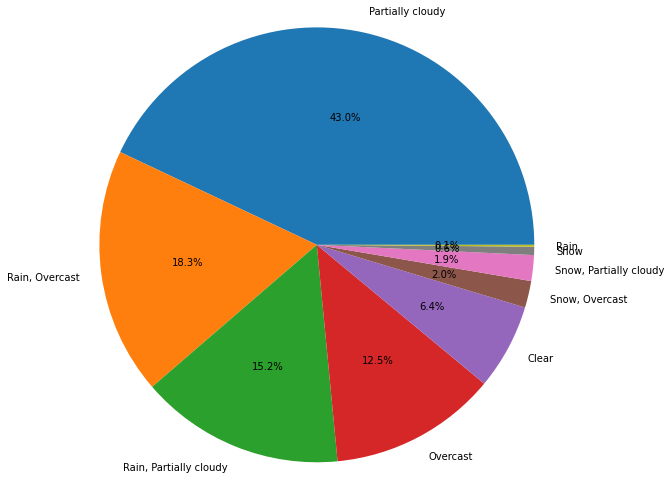

In [22]:
# display weather conditions as a pie chart
pie = weather['Conditions'].value_counts()
print(pie, '\n')
labels = pie.index 
plt.pie(pie, labels= labels,autopct='%.1f%%', radius=2.5)
plt.show()

Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

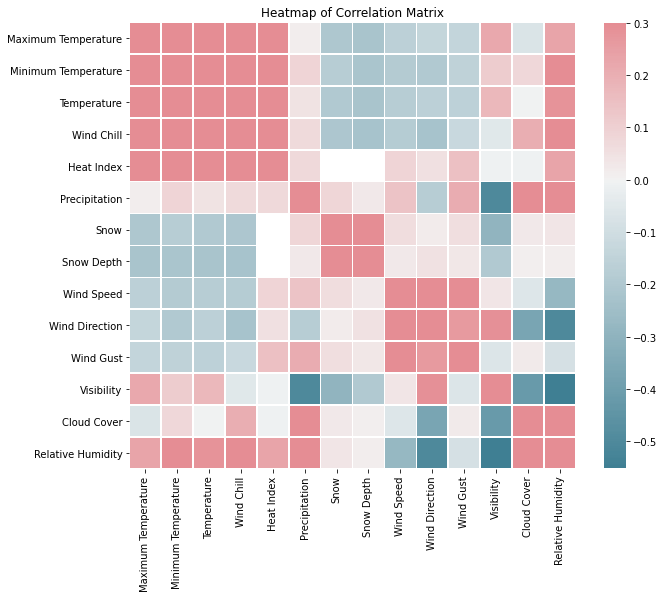

In [23]:
# heatmap of features
corr = weather.corr()
plt.figure(figsize = (10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Heatmap of Correlation Matrix')

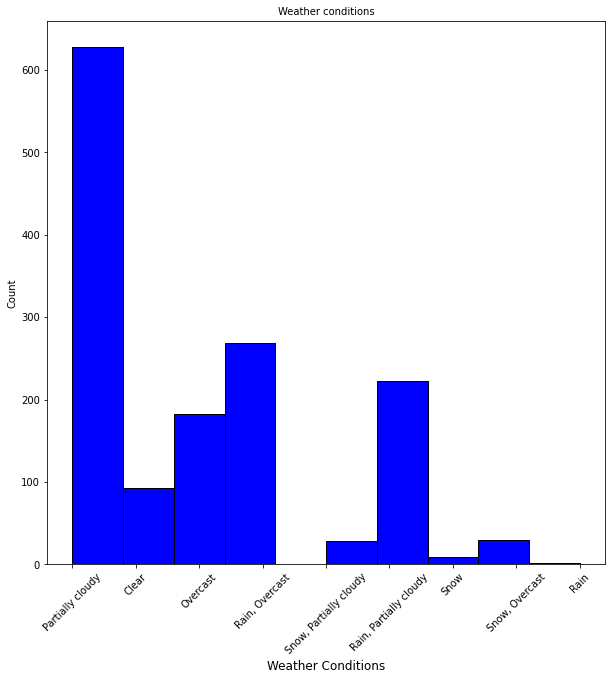

In [24]:
# histogram of weather conditions
fig = plt.figure(figsize=(10,10))
plt.hist(weather['Conditions'], color = 'blue',edgecolor = 'black')
plt.title('Weather conditions', color = 'Black', size = 10)
plt.xlabel('Weather Conditions', size= 12)
plt.tick_params(axis='x', labelsize=10, rotation=45)
plt.ylabel('Count')
plt.show()

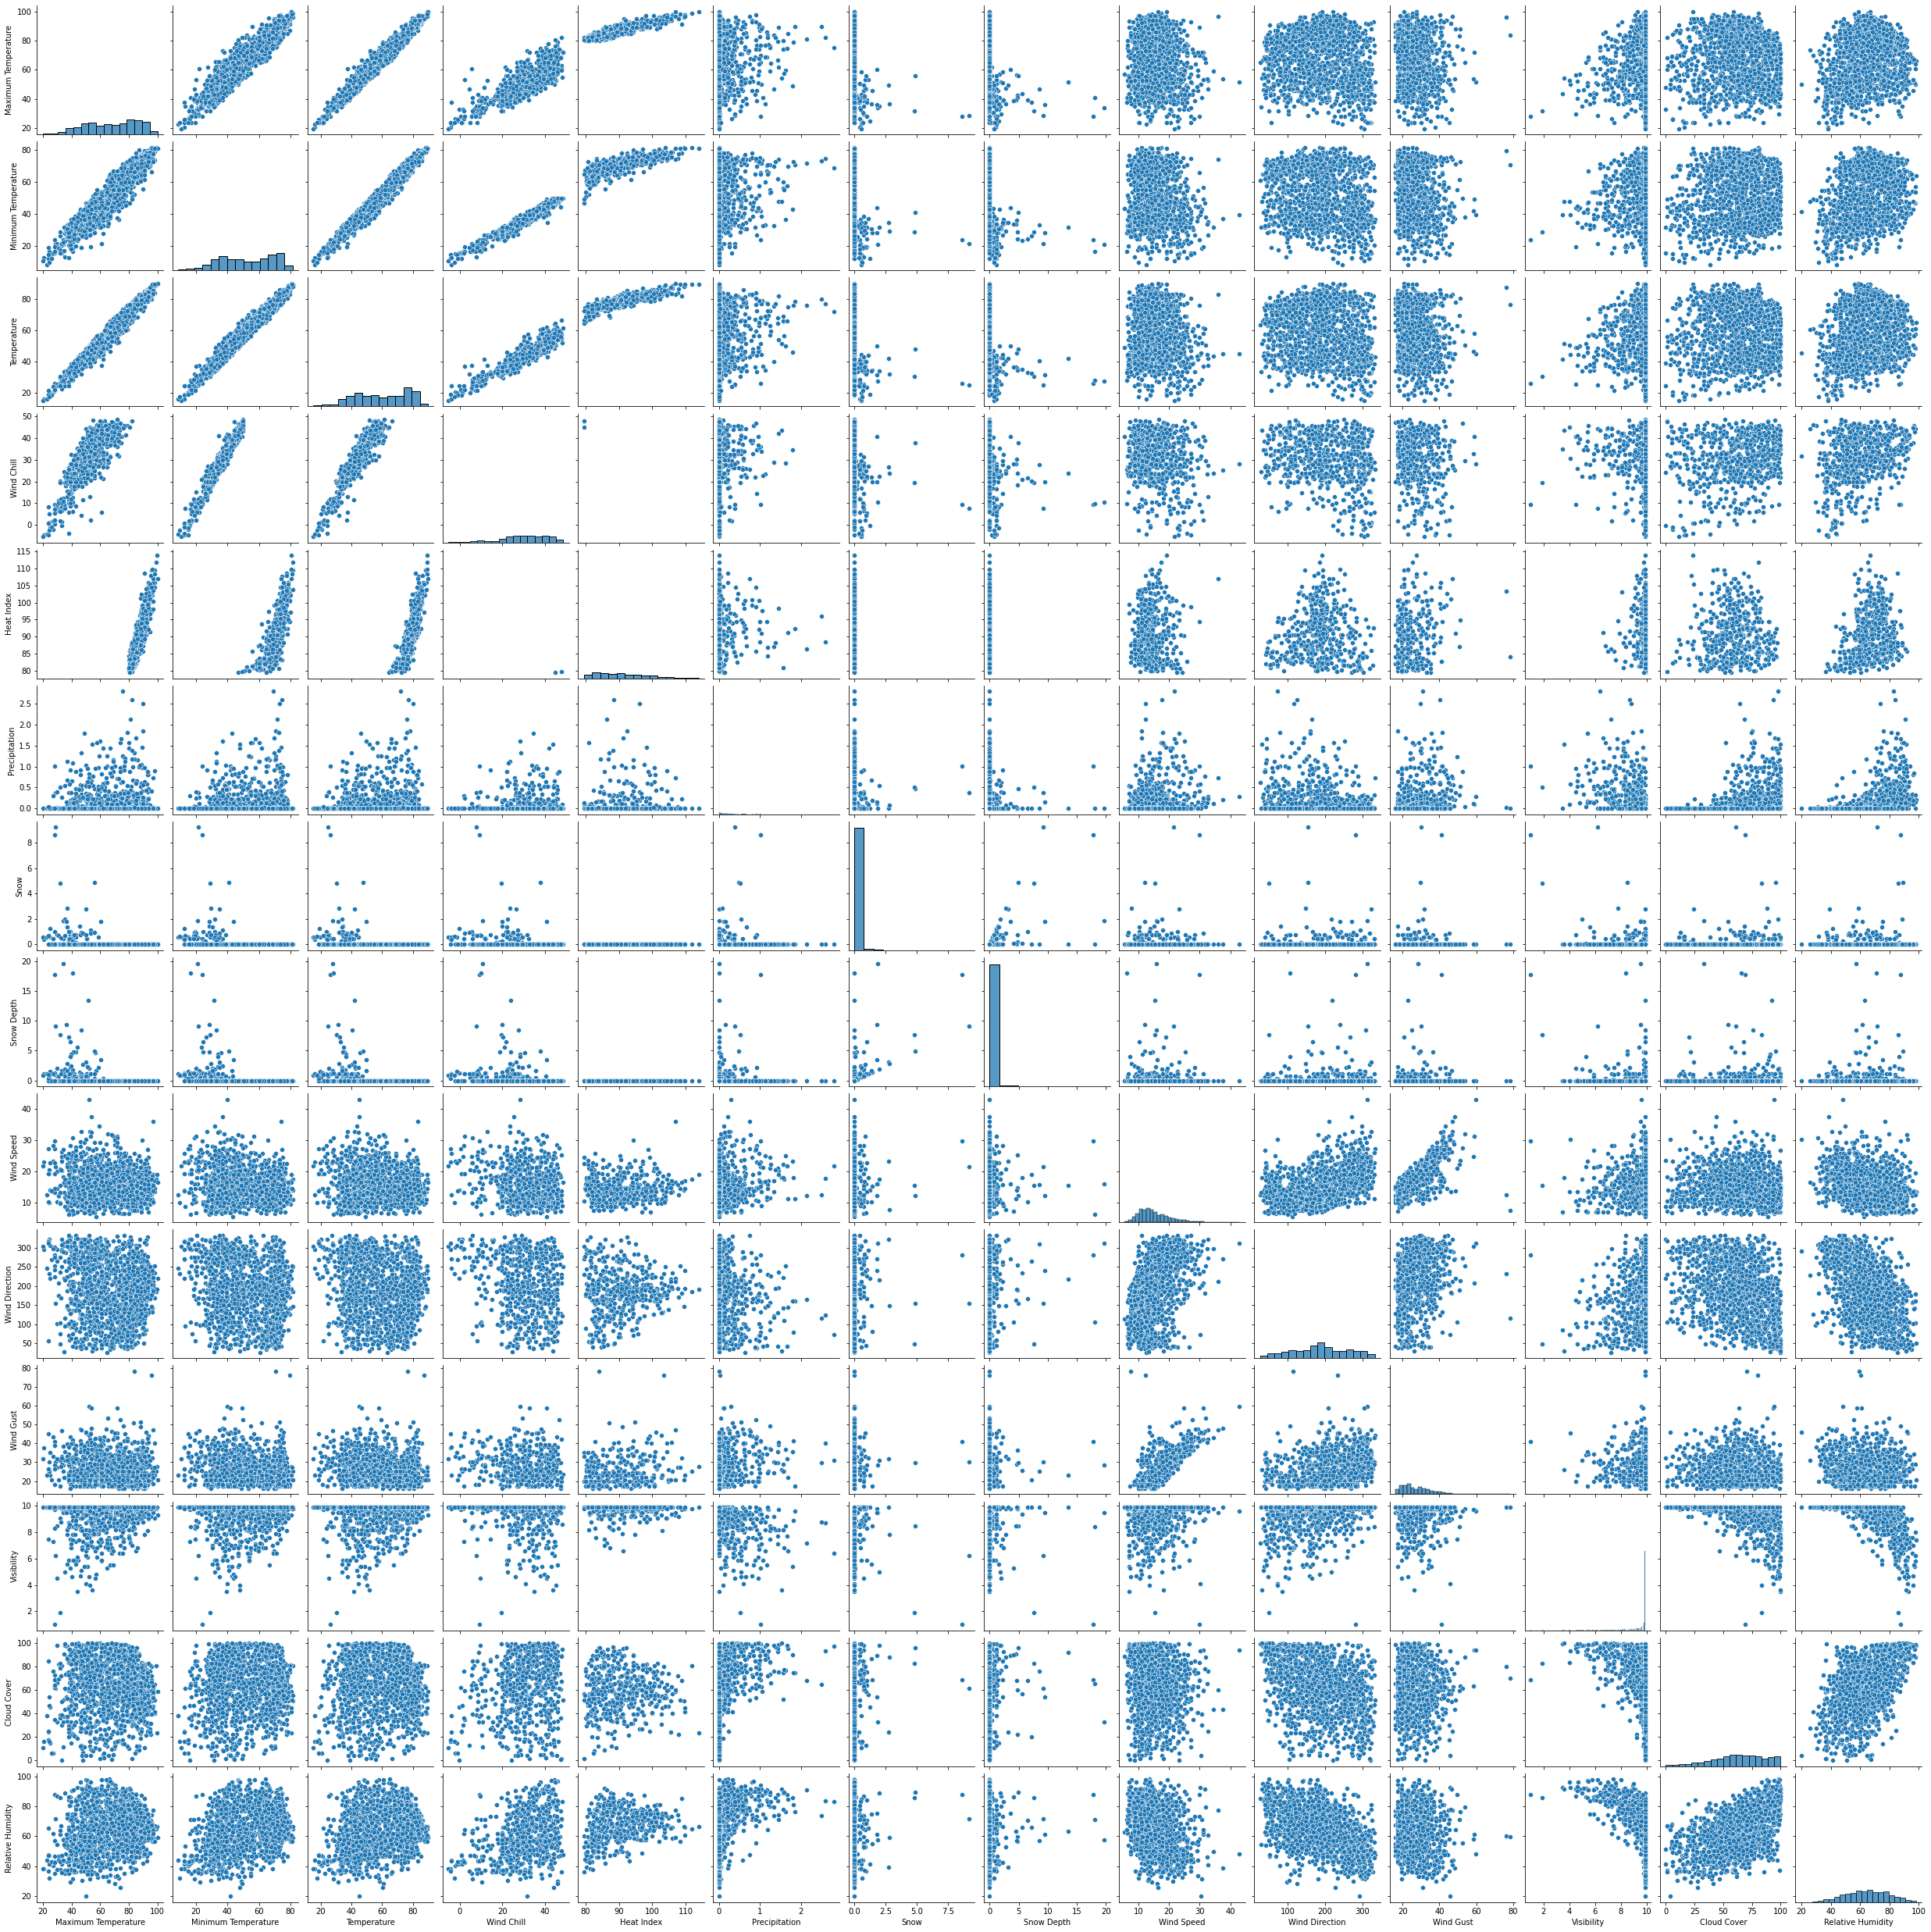

In [25]:
# pairplot to display the relationships between variables
sns.pairplot(weather)

## Merging Data Sources

In [26]:
# looking at shape data to see how many rows and columns i should expect
# in the new data set. 107,883 rows and 23 columns
crash_shape = crash.shape
weather_shape = weather.shape

print('the crash data has', crash_shape,'rows and columns')
print('the weather data has', weather_shape,'rows and columns')

the crash data has (106422, 6) rows and columns
the weather data has (1461, 17) rows and columns


In [27]:
# removes timezone and strips the time of day from the crash REPORTDATE
# column to prepared for the merge
crash.loc[: , 'REPORTDATE'] = pd.to_datetime(crash['REPORTDATE'])
crash.loc[: , 'REPORTDATE'] = crash['REPORTDATE'].dt.tz_convert(None)
crash.loc[: , 'REPORTDATE'] = crash['REPORTDATE'].dt.strftime('%Y-%m-%d')
crash.loc[: , 'REPORTDATE'] = pd.to_datetime(crash['REPORTDATE'])

# need to convert date time column in the weather DF so it can merge
weather.loc[: , 'Date time'] = pd.to_datetime(weather['Date time'])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [28]:
# merging the files on the date
merged = pd.merge(crash, weather, how = 'inner', 
                  left_on = crash['REPORTDATE'],
                  right_on = weather['Date time'])
print(merged.shape)
print(merged.columns)
print(merged.dtypes)

(106422, 24)
Index(['key_0', 'REPORTDATE', 'CrashCount', 'Hour', 'Day', 'Month', 'Year',
       'Name', 'Date time', 'Maximum Temperature', 'Minimum Temperature',
       'Temperature', 'Wind Chill', 'Heat Index', 'Precipitation', 'Snow',
       'Snow Depth', 'Wind Speed', 'Wind Direction', 'Wind Gust', 'Visibility',
       'Cloud Cover', 'Relative Humidity', 'Conditions'],
      dtype='object')
key_0                  datetime64[ns]
REPORTDATE             datetime64[ns]
CrashCount                      int64
Hour                            int64
Day                             int64
Month                           int64
Year                            int64
Name                           object
Date time              datetime64[ns]
Maximum Temperature           float64
Minimum Temperature           float64
Temperature                   float64
Wind Chill                    float64
Heat Index                    float64
Precipitation                 float64
Snow                          fl

In [29]:
# drop and rename columns
merged = merged.drop(columns = ['Date time', 'Maximum Temperature', 'Minimum Temperature', 'Wind Chill', 'Heat Index',
                               'Wind Speed', 'Wind Direction', 'Wind Gust', 'Cloud Cover','Relative Humidity', 'Temperature',
                                'Visibility', 'Conditions', 'Snow', 'Snow Depth', 'Name', 'key_0'])
merged.columns

Index(['REPORTDATE', 'CrashCount', 'Hour', 'Day', 'Month', 'Year',
       'Precipitation'],
      dtype='object')

In [30]:
# create the precipitaiton indicator
merged['Precipitation_indicator'] = np.where(merged['Precipitation'] != 0, 1, 0)

In [31]:
# grouping by date 
merged1 = merged.groupby(['Hour','Day', 'Month'], as_index=False).agg(
{
    'CrashCount':'sum',
    'Precipitation':'sum',
    'Precipitation_indicator':'sum'
})
print(merged1.dtypes)
print(merged1.shape)
merged1

Hour                         int64
Day                          int64
Month                        int64
CrashCount                   int64
Precipitation              float64
Precipitation_indicator      int64
dtype: object
(8756, 6)


Hour  Day  Month  CrashCount  Precipitation  Precipitation_indicator
0        0    1      1          14           0.85                        5
1        0    1      2          13           0.25                        9
2        0    1      3          19           4.70                       19
3        0    1      4          19           0.30                       14
4        0    1      5          11           0.94                        2
...    ...  ...    ...         ...            ...                      ...
8751    23   31      5          24           5.67                       12
8752    23   31      7          19           0.34                       14
8753    23   31      8          16           0.21                        1
8754    23   31     10          15           2.26                        2
8755    23   31     12          15           4.86                        9

[8756 rows x 6 columns]

In [32]:
# adding weekday indicator then creating groupings based off weekend, ending/begning of the week,
# and middle of the week

merged1['WEEKDAY'] = merged['REPORTDATE'].dt.dayofweek
dummy0 = pd.get_dummies(merged1['WEEKDAY'])
dummy0.columns = ['MO', 'TU', 'WE', 'TH', 'FR', 'SA', 'SU']
merged2 = pd.concat([merged1, dummy0] , axis = 1)

#dummies on hour
dummy = pd.get_dummies(merged2['Hour'])
dummy.columns = ['Hour_0','Hour_1','Hour_2','Hour_3','Hour_4','Hour_5','Hour_6','Hour_7','Hour_8','Hour_9',
                 'Hour_10','Hour_11','Hour_12','Hour_13','Hour_14','Hour_15','Hour_16','Hour_17','Hour_18',
                 'Hour_19','Hour_20','Hour_21','Hour_22','Hour_23']
merged2 = pd.concat([merged2, dummy] , axis = 1)

#real dummies on month
dummy3 = pd.get_dummies(merged2['Month'])
dummy3.columns = ['JAN', 'FEB','MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
                 'OCT', 'NOV', 'DEC']              
merged2 = pd.concat([merged2, dummy3] , axis = 1)

#breaking hour into 4 periods
merged2['T_12to5AM'] = merged2['Hour'].apply(lambda x: 1 if x < 6 else 0)
merged2['T_6to11AM'] = merged2['Hour'].apply(lambda x: 1 if (x >= 6 and x < 12) else 0)
merged2['T_12to5PM'] = merged2['Hour'].apply(lambda x: 1 if (x >= 12 and x < 18) else 0)
merged2['T_6to11PM'] = merged2['Hour'].apply(lambda x: 1 if x > 18  else 0)

# preview the data
merged2.head()

Hour  Day  Month  CrashCount  Precipitation  Precipitation_indicator  \
0     0    1      1          14           0.85                        5   
1     0    1      2          13           0.25                        9   
2     0    1      3          19           4.70                       19   
3     0    1      4          19           0.30                       14   
4     0    1      5          11           0.94                        2   

   WEEKDAY  MO  TU  WE  TH  FR  SA  SU  Hour_0  Hour_1  Hour_2  Hour_3  \
0        1   0   1   0   0   0   0   0       1       0       0       0   
1        1   0   1   0   0   0   0   0       1       0       0       0   
2        1   0   1   0   0   0   0   0       1       0       0       0   
3        1   0   1   0   0   0   0   0       1       0       0       0   
4        1   0   1   0   0   0   0   0       1       0       0       0   

   Hour_4  Hour_5  Hour_6  Hour_7  Hour_8  Hour_9  Hour_10  Hour_11  Hour_12  \
0       0       0       0       0       0       0        0        0        0   
1       0       0       0       0       0       0        0        0        0   
2       0       0       0       0       0       0        0        0        0   
3       0       0       0       0       0       0        0        0        0   
4       0       0       0       0       0       0        0        0        0   

   Hour_13  Hour_14  Hour_15  Hour_16  Hour_17  Hour_18  Hour_19  Hour_20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   Hour_21  Hour_22  Hour_23  JAN  FEB  MAR  APR  MAY  JUN  JUL  AUG  SEP  \
0        0        0        0    1    0    0    0    0    0    0    0    0   
1        0        0        0    0    1    0    0    0    0    0    0    0   
2        0        0        0    0    0    1    0    0    0    0    0    0   
3        0        0        0    0    0    0    1    0    0    0    0    0   
4        0        0        0    0    0    0    0    1    0    0    0    0   

   OCT  NOV  DEC  T_12to5AM  T_6to11AM  T_12to5PM  T_6to11PM  
0    0    0    0          1          0          0          0  
1    0    0    0          1          0          0          0  
2    0    0    0          1          0          0          0  
3    0    0    0          1          0          0          0  
4    0    0    0          1          0          0          0

In [33]:
# list the column names
merged2.columns

Index(['Hour', 'Day', 'Month', 'CrashCount', 'Precipitation',
       'Precipitation_indicator', 'WEEKDAY', 'MO', 'TU', 'WE', 'TH', 'FR',
       'SA', 'SU', 'Hour_0', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5',
       'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12',
       'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18',
       'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23', 'JAN', 'FEB',
       'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC',
       'T_12to5AM', 'T_6to11AM', 'T_12to5PM', 'T_6to11PM'],
      dtype='object')

In [34]:
# merge the variables into a dataframe
df = merged2.loc[:, ['CrashCount','Hour','WEEKDAY', 'Month', 'Precipitation_indicator']]
df.head()

CrashCount  Hour  WEEKDAY  Month  Precipitation_indicator
0          14     0        1      1                        5
1          13     0        1      2                        9
2          19     0        1      3                       19
3          19     0        1      4                       14
4          11     0        1      5                        2

Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

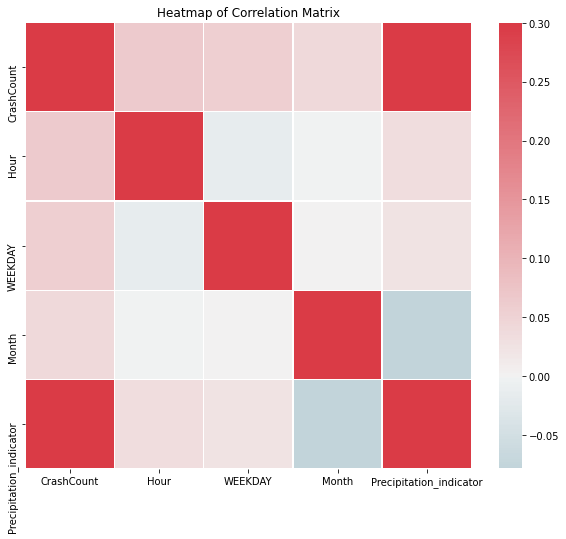

In [35]:
# heatmap of features
corr = df.corr()
plt.figure(figsize = (10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Heatmap of Correlation Matrix')

In [36]:
# set the variable type as category
merged2['Hour'] = merged2['Hour'].astype('category')
merged2['Month'] = merged2['Month'].astype('category')
merged2['WEEKDAY'] = merged2['WEEKDAY'].astype('category')
merged2['Precipitation_indicator'] = merged2['Precipitation_indicator'].astype('category')
merged2['T_12to5AM'] = merged2['T_12to5AM'].astype('category')
merged2['T_6to11AM'] = merged2['T_6to11AM'].astype('category')
merged2['T_12to5PM'] = merged2['T_12to5PM'].astype('category')
merged2['T_6to11PM'] = merged2['T_6to11PM'].astype('category')

merged2['JAN'] = merged2['JAN'].astype('category')
merged2['FEB'] = merged2['FEB'].astype('category')
merged2['MAR'] = merged2['MAR'].astype('category')
merged2['APR'] = merged2['APR'].astype('category')
merged2['MAY'] = merged2['MAY'].astype('category')
merged2['JUN'] = merged2['JUN'].astype('category')
merged2['JUL'] = merged2['JUL'].astype('category')
merged2['AUG'] = merged2['AUG'].astype('category')
merged2['SEP'] = merged2['SEP'].astype('category')
merged2['OCT'] = merged2['OCT'].astype('category')
merged2['NOV'] = merged2['NOV'].astype('category')
merged2['DEC'] = merged2['DEC'].astype('category')

merged2['Hour_0'] = merged2['Hour_0'].astype('category')
merged2['Hour_1'] = merged2['Hour_1'].astype('category')
merged2['Hour_2'] = merged2['Hour_2'].astype('category')
merged2['Hour_3'] = merged2['Hour_3'].astype('category')
merged2['Hour_4'] = merged2['Hour_4'].astype('category')
merged2['Hour_5'] = merged2['Hour_5'].astype('category')
merged2['Hour_6'] = merged2['Hour_6'].astype('category')
merged2['Hour_7'] = merged2['Hour_7'].astype('category')
merged2['Hour_8'] = merged2['Hour_8'].astype('category')
merged2['Hour_9'] = merged2['Hour_9'].astype('category')
merged2['Hour_10'] = merged2['Hour_10'].astype('category')
merged2['Hour_11'] = merged2['Hour_11'].astype('category')
merged2['Hour_12'] = merged2['Hour_12'].astype('category')
merged2['Hour_13'] = merged2['Hour_13'].astype('category')
merged2['Hour_14'] = merged2['Hour_14'].astype('category')
merged2['Hour_15'] = merged2['Hour_15'].astype('category')
merged2['Hour_16'] = merged2['Hour_16'].astype('category')
merged2['Hour_17'] = merged2['Hour_17'].astype('category')
merged2['Hour_18'] = merged2['Hour_18'].astype('category')
merged2['Hour_19'] = merged2['Hour_19'].astype('category')
merged2['Hour_20'] = merged2['Hour_20'].astype('category')
merged2['Hour_21'] = merged2['Hour_21'].astype('category')
merged2['Hour_22'] = merged2['Hour_22'].astype('category')
merged2['Hour_23'] = merged2['Hour_23'].astype('category')

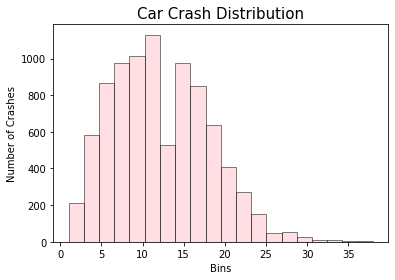

In [37]:
# histogram for Crashs
x = merged2['CrashCount']
num_bins = 20
plt.hist(x, num_bins, facecolor='pink', alpha=0.5, ec='black')

plt.xlabel('Bins')
plt.ylabel('Number of Crashes')
plt.title('Car Crash Distribution', fontsize = 15)

plt.show()

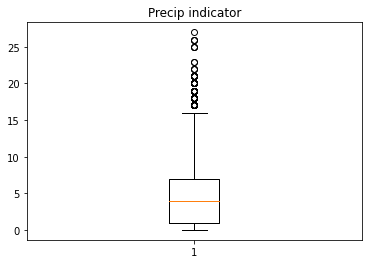

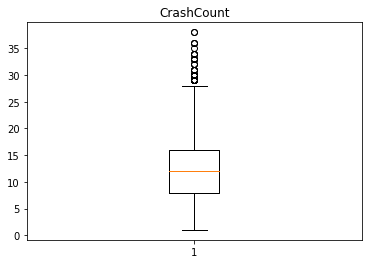

In [38]:
#crash count box and whiskers
fig1, ax1 = plt.subplots()
ax1.set_title('Precip indicator')
ax1.boxplot(merged2['Precipitation_indicator'])

#crash count box and whiskers
fig1, ax1 = plt.subplots()
ax1.set_title('CrashCount')
ax1.boxplot(merged2['CrashCount'])

plt.show()

In [39]:
# number of Crashes per weekday
week_group = merged2.groupby(['Month', 'WEEKDAY', 'T_12to5AM'])['CrashCount'].sum()
week_group

Month  WEEKDAY  T_12to5AM
1      0        0             795.0
                1             262.0
       1        0             836.0
                1             486.0
       2        0             917.0
                              ...  
12     4        1             836.0
       5        0            1021.0
                1               NaN
       6        0             444.0
                1             386.0
Name: CrashCount, Length: 168, dtype: float64

In [40]:
# number of crashes per time period
month_group = merged2.groupby(merged2['Month'])['CrashCount'].sum()
month_group

Month
1     7957
2     7311
3     9066
4     9115
5     9774
6     9458
7     9133
8     8793
9     9214
10    9573
11    8598
12    8430
Name: CrashCount, dtype: int64

In [41]:
# number of crashes per hour
time_group = merged2.groupby(merged2['Hour'])['CrashCount'].sum()
time_group

Hour
0     6222
1     6338
2     6743
3     5681
4     4701
5     3627
6     2733
7     2320
8     2293
9     2446
10    2276
11    2250
12    2504
13    3694
14    5030
15    5469
16    5259
17    5336
18    5651
19    5020
20    4069
21    4950
22    5723
23    6087
Name: CrashCount, dtype: int64

In [42]:
# number of crashes based on precipitation indicator
percip_group = merged2.groupby(['Precipitation_indicator'])['CrashCount'].sum()
percip_group

Precipitation_indicator
0     20534
1      5882
2      7735
3      8600
4     10036
5      8921
6      7347
7      6742
8      5783
9      4682
10     4469
11     3426
12     2689
13     2497
14     2144
15     1490
16      971
17      787
18      383
19      416
20      322
21      222
22       86
23       55
25       84
26       85
27       34
Name: CrashCount, dtype: int64

## Ordinary Least Square Regression

In [43]:
# run bivariate model with CrashCount and Month
ols_model1 = smf.ols(formula='CrashCount ~ Month', data=merged1).fit() 
print(ols_model1.summary())

                            OLS Regression Results                            
Dep. Variable:             CrashCount   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     14.51
Date:                Tue, 11 May 2021   Prob (F-statistic):           0.000141
Time:                        03:00:52   Log-Likelihood:                -27915.
No. Observations:                8756   AIC:                         5.583e+04
Df Residuals:                    8754   BIC:                         5.585e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.7032      0.134     87.353      0.0

In [44]:
# run bivariate model with CrashCount and Hour
ols_model1 = smf.ols(formula='CrashCount ~ Hour', data=merged1).fit() 
print(ols_model1.summary())

                            OLS Regression Results                            
Dep. Variable:             CrashCount   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     37.29
Date:                Tue, 11 May 2021   Prob (F-statistic):           1.06e-09
Time:                        03:00:52   Log-Likelihood:                -27904.
No. Observations:                8756   AIC:                         5.581e+04
Df Residuals:                    8754   BIC:                         5.583e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.5193      0.121     94.908      0.0

In [45]:
# run bivariate model with CrashCount and Precipitation
ols_model1 = smf.ols(formula='CrashCount ~ Precipitation', data=merged1).fit() 
print(ols_model1.summary())

                            OLS Regression Results                            
Dep. Variable:             CrashCount   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     758.6
Date:                Tue, 11 May 2021   Prob (F-statistic):          3.23e-160
Time:                        03:00:52   Log-Likelihood:                -27558.
No. Observations:                8756   AIC:                         5.512e+04
Df Residuals:                    8754   BIC:                         5.514e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        11.0991      0.071    155.559

                            OLS Regression Results                            
Dep. Variable:             CrashCount   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     270.8
Date:                Tue, 11 May 2021   Prob (F-statistic):          4.54e-168
Time:                        03:00:52   Log-Likelihood:                -27534.
No. Observations:                8756   AIC:                         5.508e+04
Df Residuals:                    8752   BIC:                         5.510e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        10.0847      0.166     60.616

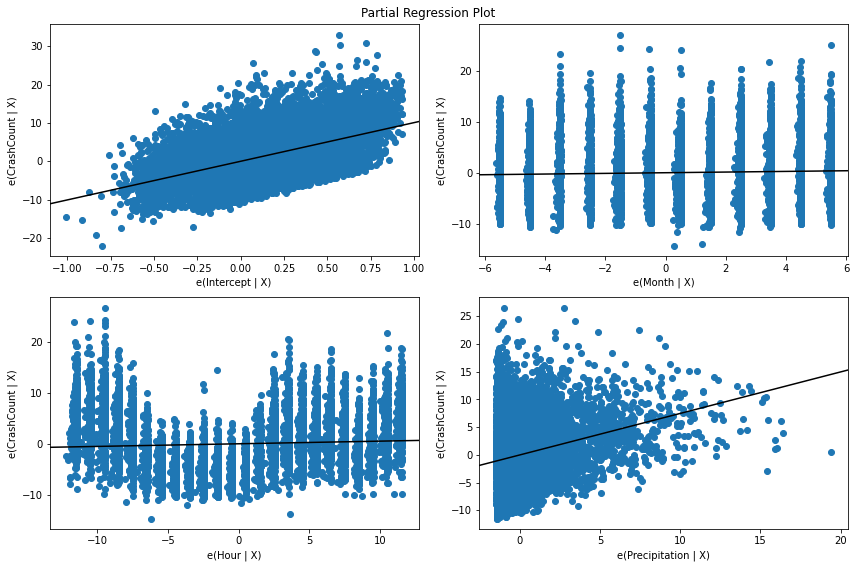

In [46]:
# run multivariate model with CrashCount against Month, Hour and Precipitation
ols_model1 = smf.ols(formula='CrashCount ~ Month + Hour + Precipitation', data=merged1).fit() 
print(ols_model1.summary())
fig = plt.figure(figsize=(12, 8))
plot_partregress_grid(ols_model1, fig=fig)
plt.show()

## Random Forest Regression

In [47]:
# labels are the values we want to predict
labels = np.array(merged2['CrashCount'])
labels

array([14, 13, 19, ..., 16, 15, 15])

In [48]:
# remove the labels from the features
# axis 1 refers to the columns
rf_df = merged2.drop(['CrashCount','Hour','Day','Month',
       'Precipitation_indicator', 'WEEKDAY', 'MO', 'TU', 'WE', 'TH', 'FR',
       'SA', 'SU', 'T_12to5AM', 'T_6to11AM', 'T_12to5PM', 'T_6to11PM'], axis = 1)
feature_list = list(rf_df.columns)

In [50]:
# split the data for training and testing
x_train, x_test, y_train, y_test = train_test_split(rf_df,labels,test_size=0.25,random_state = 42)

print('Training data set length='+str(len(x_train)))
print('Testing data set length='+str(len(x_test)))

Training data set length=6567
Testing data set length=2189


In [51]:
# random forest model
MAE = []
acc = []
n_estimators = [10,20,30,50,100,200,400,600,800,1000]
for j in n_estimators:
    rf = RandomForestRegressor(n_estimators = j ,random_state =42)
    rf.fit(x_train, y_train);
    y_pred = rf.predict(x_test)
    errors = abs(y_pred - y_test)
   
    MAE.append(round(np.mean(errors), 2))
    mape = 100 * (errors /y_test)

    accuracy = 100 - np.mean(mape)
    acc.append(round(accuracy, 2))
    
print('Mean Absolute Error:', MAE)
print('Accuracy:', acc)

Mean Absolute Error: [3.52, 3.48, 3.47, 3.46, 3.46, 3.46, 3.45, 3.45, 3.45, 3.45]
Accuracy: [58.46, 58.88, 59.02, 59.1, 59.03, 59.04, 59.15, 59.2, 59.21, 59.2]


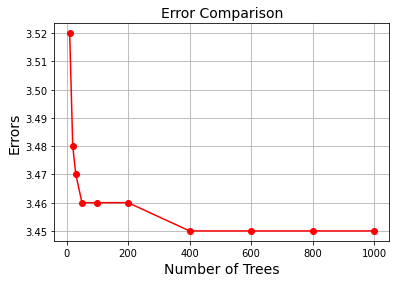

In [52]:
# plot the error comparison
plt.plot(n_estimators,MAE,color='red', marker='o')
plt.title('Error Comparison', fontsize=14)
plt.xlabel('Number of Trees', fontsize=14)
plt.ylabel('Errors', fontsize=14)
plt.grid(True)
plt.show()

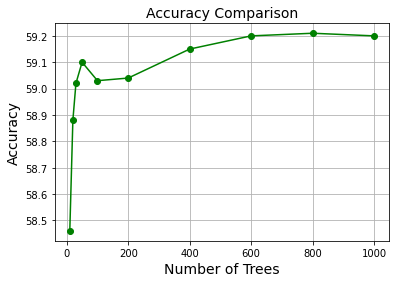

In [53]:
# plot the accuracy comparison
plt.plot(n_estimators,acc,color='Green', marker='o')
plt.title('Accuracy Comparison', fontsize=14)
plt.xlabel('Number of Trees', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True)
plt.show()

In [54]:
# Feature importances are provided by the fitted attribute feature_importances_ and they are computed as the mean and standard deviation of accumulation of the impurity decrease within each tree.
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Precipitation        Importance: 0.33
Variable: Hour_6               Importance: 0.05
Variable: Hour_9               Importance: 0.05
Variable: Hour_12              Importance: 0.05
Variable: Hour_2               Importance: 0.04
Variable: Hour_7               Importance: 0.04
Variable: Hour_8               Importance: 0.04
Variable: Hour_10              Importance: 0.04
Variable: Hour_11              Importance: 0.04
Variable: Hour_1               Importance: 0.02
Variable: Hour_5               Importance: 0.02
Variable: Hour_13              Importance: 0.02
Variable: Hour_20              Importance: 0.02
Variable: Hour_0               Importance: 0.01
Variable: Hour_3               Importance: 0.01
Variable: Hour_4               Importance: 0.01
Variable: Hour_14              Importance: 0.01
Variable: Hour_15              Importance: 0.01
Variable: Hour_16              Importance: 0.01
Variable: Hour_17              Importance: 0.01
Variable: Hour_18              Importanc

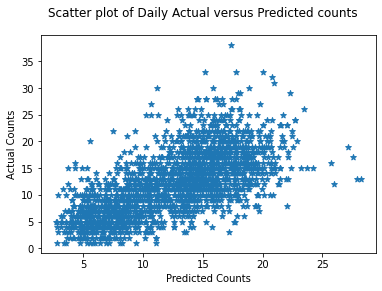

In [55]:
# display the scatterplot
fig = plt.figure()
fig.suptitle('Scatter plot of Daily Actual versus Predicted counts')
plt.scatter(x=y_pred, y=y_test, marker='*')
plt.xlabel('Predicted Counts')
plt.ylabel('Actual Counts')
plt.show()

## Poisson and Negative Binominal Regression

In [56]:
# test, train, split
mask = np.random.rand(len(merged2)) < 0.8
df_train = merged2[mask]
df_test = merged2[~mask]
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))

Training data set length=6979
Testing data set length=1777


In [57]:
merged2.columns

Index(['Hour', 'Day', 'Month', 'CrashCount', 'Precipitation',
       'Precipitation_indicator', 'WEEKDAY', 'MO', 'TU', 'WE', 'TH', 'FR',
       'SA', 'SU', 'Hour_0', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5',
       'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12',
       'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18',
       'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23', 'JAN', 'FEB',
       'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC',
       'T_12to5AM', 'T_6to11AM', 'T_12to5PM', 'T_6to11PM'],
      dtype='object')

In [58]:
# regression formula 

expr1 = """CrashCount ~  T_12to5AM + T_6to11AM + T_12to5PM + T_6to11PM + 
                        Precipitation_indicator + 
                        MO + TU + WE + TH + FR + SA + SU + 
                        JAN + FEB + MAR + APR + MAY + JUN + JUL + AUG + SEP + OCT + NOV + DEC """  

expr = """CrashCount ~  Hour_0 + Hour_1 + Hour_2 + Hour_3 + Hour_4 + Hour_5 + Hour_6 + Hour_7 + Hour_8 + Hour_9 + Hour_10 + Hour_11 + Hour_12 + Hour_13 + Hour_14 + Hour_15 + Hour_16 + Hour_17 + Hour_18 + Hour_19 + Hour_20 + Hour_21 + Hour_22 + Hour_23 +    
                        Precipitation_indicator + 
                        MO + TU + WE + TH + FR + SA + SU + 
                        JAN + FEB + MAR + APR + MAY + JUN + JUL + AUG + SEP + OCT + NOV + DEC"""

In [59]:
# set up matricies
y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

In [60]:
# poission regression
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             CrashCount   No. Observations:                 6979
Model:                            GLM   Df Residuals:                     6912
Model Family:                 Poisson   Df Model:                           66
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18972.
Date:                Tue, 11 May 2021   Deviance:                       8590.3
Time:                        03:02:19   Pearson chi2:                 8.52e+03
No. Iterations:                    70                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [61]:
# compute estimated over dispersion.
# There is over dispersion so we can not use the poission regression
ratio = poisson_training_results.pearson_chi2/poisson_training_results.df_resid
ratio2 = poisson_training_results.deviance/poisson_training_results.df_resid
print('Chi-squared to degrees of freedom ratio is',ratio)
print('Deviance to degrees of freedom ratio is',ratio2)

Chi-squared to degrees of freedom ratio is 1.232037765105696
Deviance to degrees of freedom ratio is 1.242803458709147


In [62]:
# Getting test results from the test data
poisson_predictions = poisson_training_results.get_prediction(X_test)
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

           mean   mean_se  mean_ci_lower  mean_ci_upper
2     24.955004  1.489489      22.199950      28.051967
3     20.321623  0.668031      19.053594      21.674039
11    19.223745  0.579675      18.120525      20.394132
12    13.235285  0.314280      12.633421      13.865821
17    19.393734  0.490196      18.456378      20.378696
...         ...       ...            ...            ...
8735  14.595415  0.339708      13.944559      15.276650
8739  15.074188  0.315456      14.468414      15.705325
8747  23.307788  1.501998      20.542250      26.445641
8750  17.977505  0.445746      17.124748      18.872728
8753  12.446228  0.312281      11.848973      13.073587

[1777 rows x 4 columns]


<Figure size 432x288 with 0 Axes>

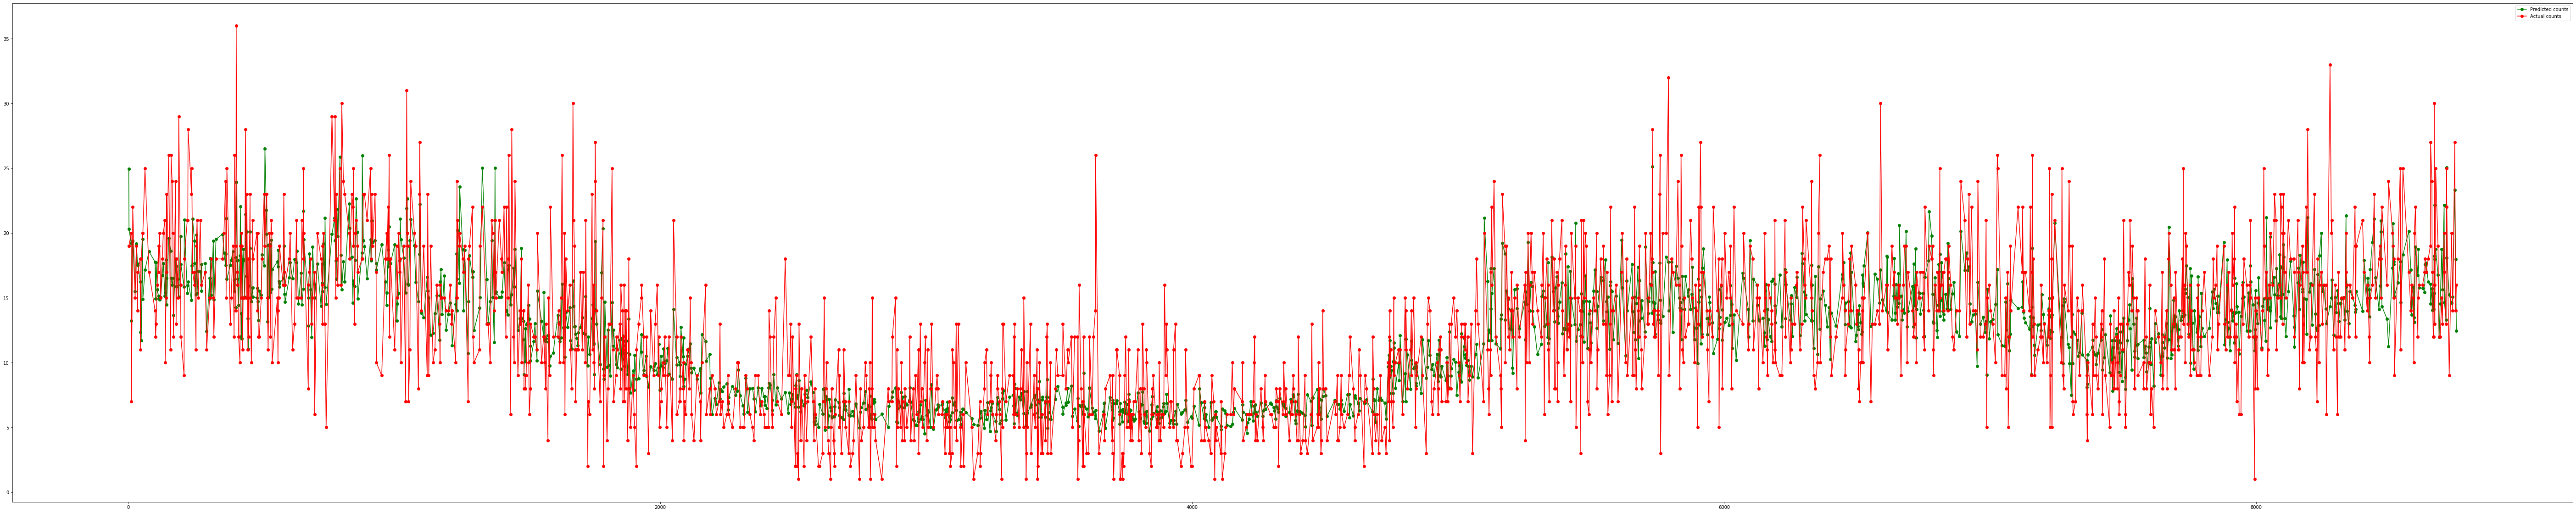

<Figure size 432x288 with 0 Axes>

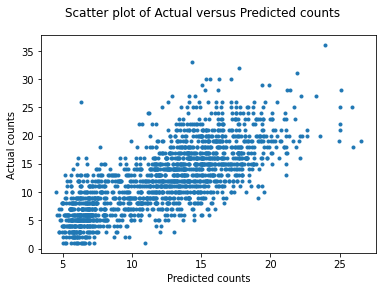

In [63]:
# plotting actual and predicted results against the index of the data
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['CrashCount']
fig = plt.figure()
plt.figure(figsize=(100, 20))
fig.suptitle('Predicted versus actual bicyclist counts on the Brooklyn bridge')
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

# scatterplot of actual vs predicted

plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()

In [64]:
# negative binomial regression
NB_training_results = sm.GLM(y_train, X_train, family = sm.families.NegativeBinomial(alpha =.05)).fit()
print(NB_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             CrashCount   No. Observations:                 6979
Model:                            GLM   Df Residuals:                     6912
Model Family:        NegativeBinomial   Df Model:                           66
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -19050.
Date:                Tue, 11 May 2021   Deviance:                       5536.6
Time:                        03:02:24   Pearson chi2:                 5.44e+03
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [65]:
# Compute estimated over dispersion.
# There is over dispersion so we can not use the poission regression
ratio = NB_training_results.pearson_chi2/NB_training_results.df_resid
ratio2 = NB_training_results.deviance/NB_training_results.df_resid
print('Chi-squared to degrees of freedom ratio is',ratio)
print('Deviance to degrees of freedom ratio is',ratio2)

Chi-squared to degrees of freedom ratio is 0.7871791240424488
Deviance to degrees of freedom ratio is 0.8010090700037301


In [66]:
# prediction on the X training set. Mean is predicted values of the train set
NB_prediction = NB_training_results.get_prediction(X_test)
NB_predicted_summary_frame = NB_prediction.summary_frame()
print(NB_predicted_summary_frame)

           mean   mean_se  mean_ci_lower  mean_ci_upper
2     25.151908  2.165999      21.245565      29.776496
3     20.441580  0.914087      18.726269      22.314013
11    19.390766  0.792755      17.897616      21.008485
12    13.266670  0.409369      12.488102      14.093777
17    19.717656  0.663786      18.458652      21.062533
...         ...       ...            ...            ...
8735  14.613908  0.442656      13.771570      15.507769
8739  14.876897  0.411569      14.091716      15.705827
8747  23.310226  2.161635      19.436217      27.956399
8750  18.109903  0.597051      16.976711      19.318735
8753  12.398892  0.398281      11.642341      13.204606

[1777 rows x 4 columns]


<Figure size 432x288 with 0 Axes>

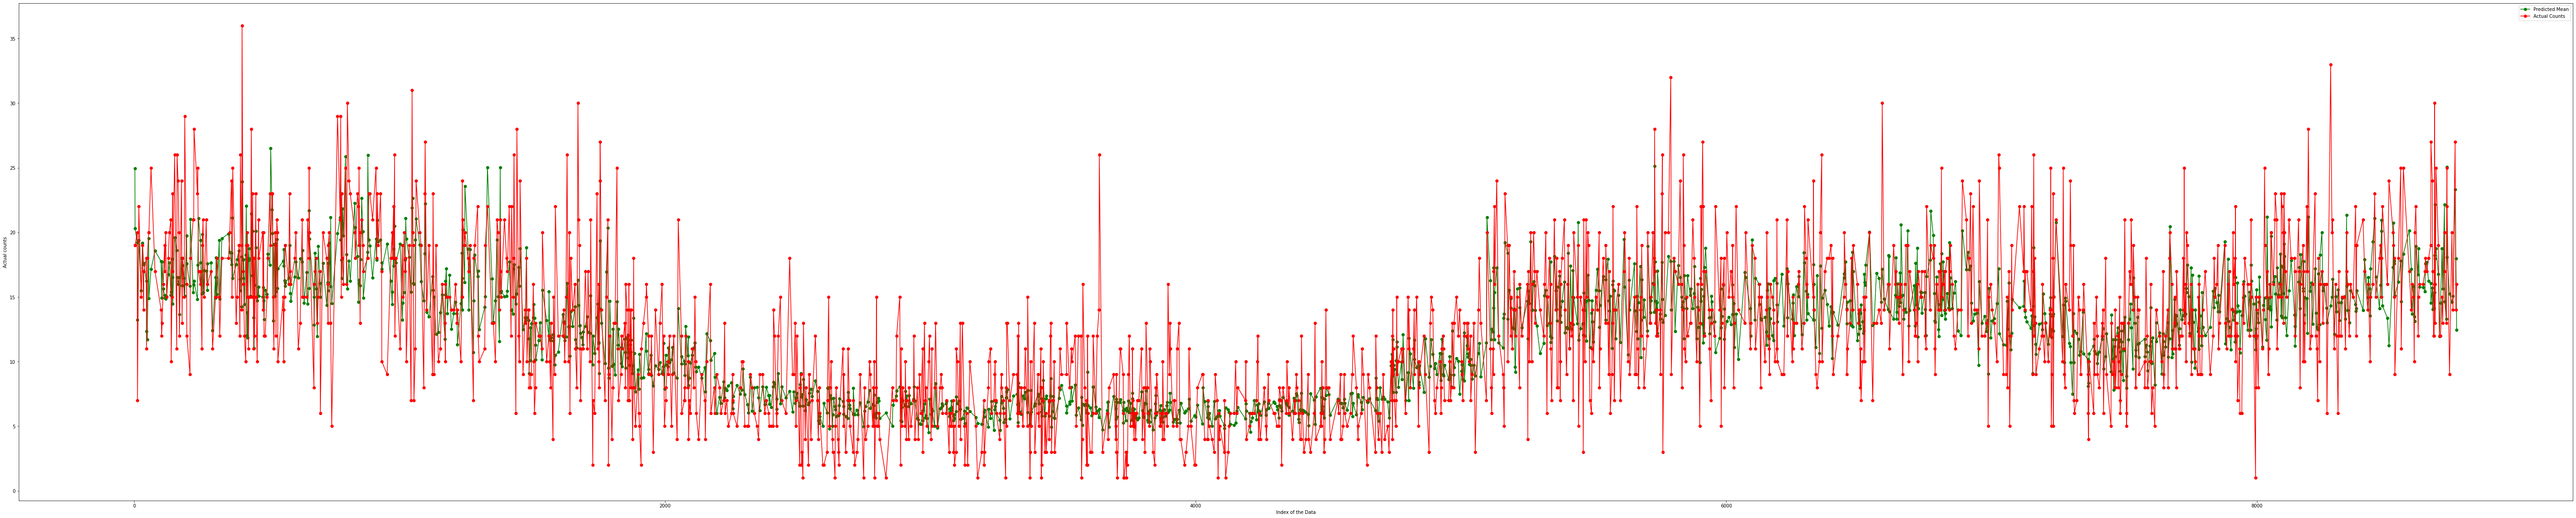

<Figure size 432x288 with 0 Axes>

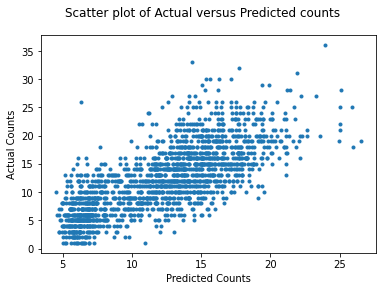

In [67]:
# plot of actual and predicted values against an index
actual_counts = y_test['CrashCount']
fig = plt.figure()
plt.figure(figsize=(100, 20))
fig.suptitle('Predicted versus actual car crash counts')
plt.xlabel('Index of the Data')
plt.ylabel('Actual counts')
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted Mean')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual Counts')
plt.legend(handles=[predicted, actual])
plt.show()

# scatter of actual v prediced
NB_predicted_summary_frame=predictions_summary_frame['mean']
plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=NB_predicted_summary_frame, y=actual_counts, marker='.')
plt.xlabel('Predicted Counts')
plt.ylabel('Actual Counts')
plt.show()

In [68]:
# root mean squared error 
y_actual = y_test
y_predicted = predictions_summary_frame['mean']

rmse = mean_squared_error(y_actual, y_predicted, squared=False)
print("The root mean squared error is",rmse)
print('The max value of the data is',y_predicted.max())
print('The min value of the data is',y_predicted.min())

The root mean squared error is 3.970959724700297
The max value of the data is 26.512555094887105
The min value of the data is 4.519067982493126


In [69]:
# comparing poission and negative binomial models by the liklihood ratio test

L1 = poisson_training_results.llf
L2 = NB_training_results.llf

def likelihood_ratio(llmin, llmax):
    return(2*(llmax-llmin))

LR = likelihood_ratio(L1,L2)
print(LR)

p = chi2.sf(LR, 22) # L2 has 1 DoF more than L1
print(p)

-155.35627045960427
1.0


In [70]:
# raw residuals
y_actual = y_test
y_predicted=predictions_summary_frame['mean']
rr = (y_actual - y_predicted)
rr

CrashCount   2   3  11  12  17  26  31  35  36  45  46  49  54  55  63  \
2            NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
3            NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
11           NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
12           NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
17           NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
...          ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
8735         NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
8739         NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
8747         NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
8750         NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
8753         NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   

      78  101  103  105  109  114  115  118  122  128  132  138  139  142  \
2    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
11   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
12   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
17   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
...   ..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
8735 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
8739 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
8747 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
8750 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
8753 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

      144  145  152  160  161  165  168  170  178  180  182  188  190  197  \
2     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
11    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
12    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
17    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
8735  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
8739  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
8747  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
8750  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
8753  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

      198  210  211  222  224  225  238  239  242  249  250  255  256  259  \
2     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
11    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
12    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
17    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
8735  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
8739  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
8747  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
8750  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
8753  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

      263  271  275  276  289  295  306  307  308  312  320  322  330  355  \
2     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
11    NaN  N